Play with my face

https://imotions.com/blog/facial-action-coding-system/

Ideas: Classifier with a previous autoencoder (unsupervised)

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_au_class = pd.read_csv("Video Test 4.au_class.csv") 
data_au_reg = pd.read_csv("Video Test 4.au_reg.csv") 
#data_hog = pd.read_csv("Video Test 4.hog.csv")
data_landmarks_2d = pd.read_csv("Video Test 4.landmarks_2d.csv")
data_landmarks_3d = pd.read_csv("Video Test 4.landmarks_3d.csv")
data_params = pd.read_csv("Video Test 4.params.csv")
data_pose = pd.read_csv("Video Test 4.pose.csv")

In [4]:
data_au_reg

,frame,success,confidence,AU01,AU02,AU04,AU06,AU09,AU10,AU12,AU14,AU15,AU17,AU20,AU25
0,0,1,0.975,1.89,0.26,0.00,0.00,0.37,0.00,0.50,0.00,0.22,0.00,0.34,0.40
1,1,1,0.974,2.04,0.12,0.00,0.00,0.81,0.00,0.63,0.00,0.43,0.00,0.09,0.63
2,2,1,0.974,2.16,0.00,0.00,0.00,0.57,0.00,0.67,0.00,0.19,0.00,0.21,0.49
3,3,1,0.975,2.09,0.00,0.00,0.00,0.74,0.00,0.64,0.00,0.31,0.00,0.24,0.52
4,4,1,0.976,2.21,0.00,0.00,0.00,0.59,0.00,0.72,0.00,0.10,0.00,0.30,0.82
5,5,1,0.979,2.19,0.00,0.00,0.00,0.71,0.00,0.68,0.00,0.04,0.00,0.11,0.48
6,6,1,0.977,2.27,0.00,0.00,0.00,0.24,0.00,0.59,0.00,0.10,0.01,0.33,0.47
7,7,1,0.977,2.19,0.00,0.00,0.00,0.40,0.00,0.50,0.00,0.16,0.00,0.38,0.42
8,8,1,0.978,2.09,0.00,0.00,0.00,0.21,0.00,0.76,0.00,0.13,0.04,0.50,0.64
9,9,1,0.978,0.17,0.18,0.11,0.07,0.10,0.08,0.03,0.16,0.23,0.22,0.69,0.11


In [5]:
data_au_class

,frame,success,confidence,AU04,AU12,AU15,AU23,AU28,AU45
0,0,1,0.975,0,0,0,1,0,0
1,1,1,0.974,0,0,0,1,0,0
2,2,1,0.974,0,0,0,1,0,0
3,3,1,0.975,0,0,0,1,0,0
4,4,1,0.976,0,0,0,1,0,0
5,5,1,0.979,0,0,0,1,0,1
6,6,1,0.977,0,0,0,1,0,0
7,7,1,0.977,0,0,0,1,0,0
8,8,1,0.978,0,0,0,1,0,0
9,9,1,0.978,0,0,0,1,0,0


In [6]:
data_landmarks_2d

,frame,success,confidence,x0,x1,x2,x3,x4,x5,x6,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
0,0,1,0.975,464.63,464.53,469.28,476.40,487.70,505.94,529.11,...,424.90,418.28,404.78,404.81,406.68,406.02,408.33,406.81,407.80,405.72
1,1,1,0.974,465.06,464.75,469.31,476.16,487.23,505.36,528.49,...,424.83,418.21,404.71,404.90,406.82,406.11,408.26,406.86,407.87,405.71
2,2,1,0.974,464.97,464.42,468.82,475.65,486.79,505.21,528.86,...,424.92,418.18,404.51,404.89,406.83,406.13,408.21,406.86,407.80,405.63
3,3,1,0.975,465.18,464.47,468.67,475.32,486.24,504.51,528.23,...,424.97,418.23,404.51,404.90,406.85,406.16,408.25,406.99,407.90,405.69
4,4,1,0.976,465.69,464.87,468.94,475.44,486.22,504.39,528.01,...,425.01,418.27,404.48,405.00,406.98,406.30,408.33,407.02,407.91,405.68
5,5,1,0.979,466.09,465.15,469.06,475.45,486.26,504.65,528.45,...,425.07,418.45,404.71,405.15,407.10,406.43,408.45,407.26,408.14,405.96
6,6,1,0.977,466.47,465.51,469.40,475.76,486.45,504.67,528.32,...,425.46,418.79,405.03,405.50,407.48,406.86,408.92,407.65,408.46,406.22
7,7,1,0.977,466.52,465.58,469.46,475.75,486.35,504.38,527.83,...,425.52,418.97,405.43,405.82,407.80,407.16,409.20,407.91,408.74,406.50
8,8,1,0.978,466.70,465.72,469.55,475.77,486.29,504.30,527.76,...,425.67,419.09,405.46,405.96,407.96,407.33,409.32,408.00,408.83,406.59
9,9,1,0.978,466.74,465.76,469.60,475.81,486.34,504.38,527.99,...,425.65,419.13,405.62,406.21,408.20,407.53,409.38,408.20,409.04,406.78


In [7]:
data_landmarks_3d

,frame,success,confidence,X0,X1,X2,X3,X4,X5,X6,...,Z58,Z59,Z60,Z61,Z62,Z63,Z64,Z65,Z66,Z67
0,0,1,0.975,-43.47,-43.99,-41.67,-37.71,-30.87,-19.87,-6.22,...,409.88,413.87,419.48,409.24,407.84,407.99,416.70,407.44,407.26,408.69
1,1,1,0.974,-43.05,-43.74,-41.58,-37.83,-31.15,-20.23,-6.58,...,410.25,414.18,419.79,409.70,408.33,408.44,416.98,407.78,407.63,409.05
2,2,1,0.974,-43.03,-43.86,-41.81,-38.09,-31.38,-20.30,-6.36,...,409.71,413.63,419.27,409.11,407.76,407.85,416.50,407.24,407.10,408.49
3,3,1,0.975,-42.87,-43.79,-41.86,-38.25,-31.68,-20.70,-6.73,...,409.88,413.78,419.44,409.28,407.94,407.98,416.64,407.41,407.28,408.66
4,4,1,0.976,-42.54,-43.53,-41.69,-38.18,-31.70,-20.78,-6.85,...,409.94,413.80,419.43,409.36,408.03,408.07,416.63,407.42,407.30,408.67
5,5,1,0.979,-42.36,-43.43,-41.68,-38.24,-31.74,-20.68,-6.62,...,411.16,414.95,420.56,410.53,409.26,409.25,417.80,408.75,408.63,409.94
6,6,1,0.977,-42.14,-43.21,-41.47,-38.05,-31.63,-20.67,-6.70,...,411.32,415.20,420.89,410.76,409.47,409.40,417.99,408.78,408.70,410.05
7,7,1,0.977,-42.08,-43.14,-41.41,-38.03,-31.68,-20.83,-6.98,...,411.06,414.95,420.66,410.56,409.26,409.21,417.89,408.56,408.48,409.84
8,8,1,0.978,-41.96,-43.05,-41.35,-38.02,-31.72,-20.89,-7.03,...,410.97,414.86,420.60,410.54,409.23,409.18,417.72,408.48,408.41,409.78
9,9,1,0.978,-41.91,-42.99,-41.28,-37.96,-31.66,-20.82,-6.89,...,410.51,414.40,420.24,410.14,408.87,408.84,417.53,408.16,408.05,409.40


In [8]:
data_params

,frame,success,confidence,scale,rot_x,rot_y,rot_z,tx,ty,p0,...,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33
0,0,1,0.975,1.89837,0.24665,0.07010,0.02678,590.64645,339.62738,-15.62638,...,0.43715,0.14183,0.24539,-0.05979,0.18946,-0.03854,0.26269,0.05543,-0.14696,-0.01425
1,1,1,0.974,1.89926,0.26235,0.06967,0.02970,590.70034,339.34066,-17.15635,...,0.50994,-0.10847,0.43055,-0.12860,0.18686,-0.06963,0.29686,0.05433,-0.15423,-0.03177
2,2,1,0.974,1.90163,0.26471,0.06693,0.03045,590.85281,339.30990,-16.23960,...,0.18929,-0.06517,0.50679,-0.11514,0.21741,-0.04785,0.29665,0.03709,-0.15066,-0.04085
3,3,1,0.975,1.90102,0.26598,0.06508,0.03239,591.00870,339.31067,-16.48488,...,0.09200,-0.04201,0.52380,-0.12975,0.21384,-0.05603,0.28483,0.03167,-0.16909,-0.04874
4,4,1,0.976,1.90135,0.27026,0.06554,0.03461,591.20113,339.31192,-16.51260,...,0.06689,-0.06443,0.61574,-0.18835,0.22151,-0.07744,0.28768,0.04581,-0.17270,-0.04866
5,5,1,0.979,1.89656,0.27498,0.06712,0.03469,591.40233,339.61876,-17.50159,...,0.04140,-0.12274,0.61851,-0.15631,0.22653,-0.11104,0.27223,0.03953,-0.15672,-0.05978
6,6,1,0.977,1.89623,0.27808,0.06814,0.03604,591.58263,339.87643,-17.58136,...,-0.03357,-0.12853,0.57711,-0.12356,0.21217,-0.10619,0.28725,0.03062,-0.17680,-0.05205
7,7,1,0.977,1.89704,0.27883,0.06730,0.03669,591.60583,340.09478,-17.15919,...,0.15674,-0.13467,0.61703,-0.22047,0.18207,-0.12845,0.30026,0.05242,-0.17837,-0.03778
8,8,1,0.978,1.89741,0.28079,0.06854,0.03710,591.64544,340.25971,-17.16899,...,0.15995,-0.16520,0.61063,-0.22205,0.17094,-0.12244,0.29612,0.04637,-0.18263,-0.02695
9,9,1,0.978,1.89878,0.28114,0.06486,0.03701,591.98705,340.39167,-16.28828,...,0.19919,-0.19185,0.49720,-0.18846,0.19025,-0.12353,0.29156,0.02374,-0.17240,-0.03843


In [9]:
data_pose

,frame,success,confidence,pose_X(mm),pose_Y(mm),pose_Z(mm),pitch(rad),yaw(rad),roll(rad)
0,0,1,0.975,26.176,-9.924,416.845,0.250,0.110,0.029
1,1,1,0.974,26.208,-10.023,416.959,0.267,0.109,0.032
2,2,1,0.974,26.257,-10.020,416.425,0.269,0.107,0.032
3,3,1,0.975,26.348,-10.022,416.563,0.271,0.106,0.034
4,4,1,0.976,26.445,-10.008,416.554,0.275,0.107,0.036
5,5,1,0.979,26.619,-9.862,417.700,0.280,0.108,0.036
6,6,1,0.977,26.720,-9.724,417.853,0.283,0.109,0.038
7,7,1,0.977,26.721,-9.606,417.646,0.284,0.109,0.038
8,8,1,0.978,26.736,-9.515,417.611,0.285,0.110,0.039
9,9,1,0.978,26.898,-9.439,417.257,0.286,0.107,0.038


In [24]:
data_au_reg["AU01"] #selecting columns

0      1.89
1      2.04
2      2.16
3      2.09
4      2.21
5      2.19
6      2.27
7      2.19
8      2.09
9      0.17
10     0.18
11     0.00
12     0.02
13     0.04
14     0.33
15     0.15
16     0.21
17     0.25
18     0.32
19     0.16
20     0.29
21     0.25
22     0.19
23     0.21
24     0.08
25     0.20
26     0.38
27     0.36
28     0.43
29     0.38
       ... 
180    0.19
181    0.26
182    0.19
183    0.33
184    0.28
185    0.00
186    0.00
187    0.12
188    0.19
189    0.19
190    0.32
191    0.44
192    0.26
193    0.17
194    0.09
195    0.08
196    0.18
197    0.27
198    0.31
199    0.39
200    0.26
201    0.19
202    0.07
203    0.00
204    0.02
205    0.00
206    0.01
207    0.10
208    0.03
209    0.00
Name: AU01, Length: 210, dtype: float64

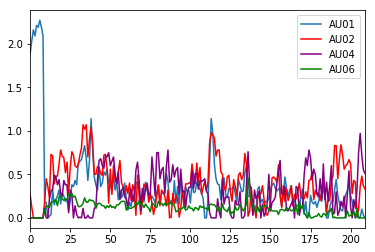

In [31]:
ax = plt.gca()

data_au_reg.plot(kind='line',y='AU01',ax=ax) #Inner Brow Raiser
data_au_reg.plot(kind='line',y='AU02', color='red', ax=ax) #Outer Brow Raiser (unilateral, right side)
data_au_reg.plot(kind='line',y='AU04', color='purple', ax=ax)
data_au_reg.plot(kind='line',y='AU06', color='green', ax=ax)

plt.show()

In [21]:
data_au_reg.values[0]

array([0.   , 1.   , 0.975, 1.89 , 0.26 , 0.   , 0.   , 0.37 , 0.   ,
       0.5  , 0.   , 0.22 , 0.   , 0.34 , 0.4  ])

In [7]:
len(data_au_reg.values)

210

In [18]:
data_au_reg.values

array([[0.00e+00, 1.00e+00, 9.75e-01, ..., 0.00e+00, 3.40e-01, 4.00e-01],
       [1.00e+00, 1.00e+00, 9.74e-01, ..., 0.00e+00, 9.00e-02, 6.30e-01],
       [2.00e+00, 1.00e+00, 9.74e-01, ..., 0.00e+00, 2.10e-01, 4.90e-01],
       ...,
       [2.07e+02, 1.00e+00, 9.84e-01, ..., 1.00e-02, 7.60e-01, 0.00e+00],
       [2.08e+02, 1.00e+00, 9.83e-01, ..., 6.00e-02, 6.60e-01, 0.00e+00],
       [2.09e+02, 1.00e+00, 9.82e-01, ..., 4.00e-02, 2.40e-01, 0.00e+00]])

In [8]:
data_au_reg.values[0]

array([0.   , 1.   , 0.975, 1.89 , 0.26 , 0.   , 0.   , 0.37 , 0.   ,
       0.5  , 0.   , 0.22 , 0.   , 0.34 , 0.4  ])

In [11]:
data_au_reg.values[1:3]

array([[1.   , 1.   , 0.974, 2.04 , 0.12 , 0.   , 0.   , 0.81 , 0.   ,
        0.63 , 0.   , 0.43 , 0.   , 0.09 , 0.63 ],
       [2.   , 1.   , 0.974, 2.16 , 0.   , 0.   , 0.   , 0.57 , 0.   ,
        0.67 , 0.   , 0.19 , 0.   , 0.21 , 0.49 ]])

In [23]:
data_au_reg.values[0,3] #AU01 frame 0

1.89

In [16]:
AU01 = []
for i in range(len(data_au_reg.values)):
    AU01.append(data_au_reg.values[i,3])
    

In [17]:
AU01

[1.89,
 2.04,
 2.16,
 2.09,
 2.21,
 2.19,
 2.27,
 2.19,
 2.09,
 0.17,
 0.18,
 0.0,
 0.02,
 0.04,
 0.33,
 0.15,
 0.21,
 0.25,
 0.32,
 0.16,
 0.29,
 0.25,
 0.19,
 0.21,
 0.08,
 0.2,
 0.38,
 0.36,
 0.43,
 0.38,
 0.63,
 0.65,
 0.67,
 0.75,
 0.83,
 0.68,
 0.43,
 0.66,
 1.14,
 0.77,
 0.47,
 0.38,
 0.32,
 0.57,
 0.36,
 0.4,
 0.53,
 0.49,
 0.56,
 0.4,
 0.39,
 0.3,
 0.51,
 0.32,
 0.41,
 0.21,
 0.32,
 0.23,
 0.28,
 0.4,
 0.21,
 0.09,
 0.18,
 0.13,
 0.27,
 0.18,
 0.41,
 0.4,
 0.39,
 0.14,
 0.26,
 0.18,
 0.41,
 0.31,
 0.28,
 0.22,
 0.25,
 0.22,
 0.17,
 0.29,
 0.37,
 0.17,
 0.28,
 0.29,
 0.29,
 0.51,
 0.42,
 0.16,
 0.2,
 0.16,
 0.43,
 0.17,
 0.36,
 0.16,
 0.46,
 0.31,
 0.13,
 0.36,
 0.3,
 0.32,
 0.17,
 0.41,
 0.29,
 0.3,
 0.41,
 0.35,
 0.33,
 0.28,
 0.22,
 0.0,
 0.0,
 0.21,
 0.64,
 1.14,
 0.97,
 0.61,
 0.45,
 0.39,
 0.38,
 0.21,
 0.46,
 0.46,
 0.27,
 0.23,
 0.34,
 0.33,
 0.33,
 0.37,
 0.28,
 0.18,
 0.44,
 0.38,
 0.3,
 0.31,
 0.52,
 0.59,
 0.25,
 0.25,
 0.22,
 0.04,
 0.14,
 0.1,
 0.33,
 0.36,
 0.18,

### PyMC3 http://people.duke.edu/~ccc14/sta-663-2016/16C_PyMC3.html

In [14]:
import pymc3 as pm
import numpy.random as rng
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler